## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [10]:
import numpy as np
import pandas as pd

cars = pd.read_csv('USA_cars_datasets.csv')
cars = cars.loc[:, ['price', 'year', 'mileage']]
print(cars['price'].unique())

[ 6300  2899  5350 25000 27700  5700  7300 13350 14600  5250 10400 12920
 31900  5430 20700 12710  5200 16500  5210 38100 12520 15000  6180 20800
 11900 21500 12000  4190 13000 18500 29800  5330 16600 19200  7320  7000
 30500  6330 55000 16200 19000  5580 54000 16000 27000  7760 19600 20000
 18100 23000 13490 17800  6650 29100 21100 18600  4340 19300 12780 15800
 29400  4430 19400 15900 26400  4140 18300 17900  4640 24000 13200 18000
 14900 11500  9110  7350 24500  9300 39800 53500 15110 34000 26502  5990
 13600 23605 10780 13800 25201  7070  8700 18003  8530 23100 17000 34002
  6980 20802  9200 26500 24802 28500 47500 23500 23505 10940 32100 53000
  6830 26414  4160 19405  5690 25900 24005  5090 19500 32012  6800  4260
     0 31802  7210 28402 33300  6700  6440 19900 37000  4040 22300 31200
  4290 22800 19002 39000  6060 28800 40000  6140 21000 20105  6760 25800
  5470 24502  7900 27305 15290 25502  3800  1400 18402   175 24503 15840
 20500 21003  4200 17400 32001 15700 31009  3740  5

In [13]:
print(cars['year'].unique())

[2008 2011 2018 2014 2010 2017 2009 2013 2015 2020 2016 1973 2003 2019
 2002 2000 2001 2005 2012 2006 2007 1998 2004 1994 1997 1996 1999 1984
 1995 1993]


In [9]:
print(cars['mileage'].unique())

[274117 190552  39590 ...  34553  32557  31371]


In [15]:
print("There are no NaN values it seems, just a weird '...' value which I'm unsure of whether it should be cleaned")

There are no NaN values it seems, just a weird '...' value which I'm unsure of whether it should be cleaned


2. Maxmin normalize `year` and `mileage`.

In [74]:
# RESOURCES
# https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475#:~:text=The%20min%2Dmax%20approach%20(often,max()%20methods.

def min_max_scaling(df, columns):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in columns:
        df_norm[column] = (df[column]-min(df[column]))/(max(df[column])-min(df[column]))
        
    return df_norm

In [75]:
df_cars_normalized = min_max_scaling(cars, ['year', 'mileage'])
print(df_cars_normalized.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [76]:
from sklearn.model_selection import train_test_split
y = cars['price']
X = cars.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

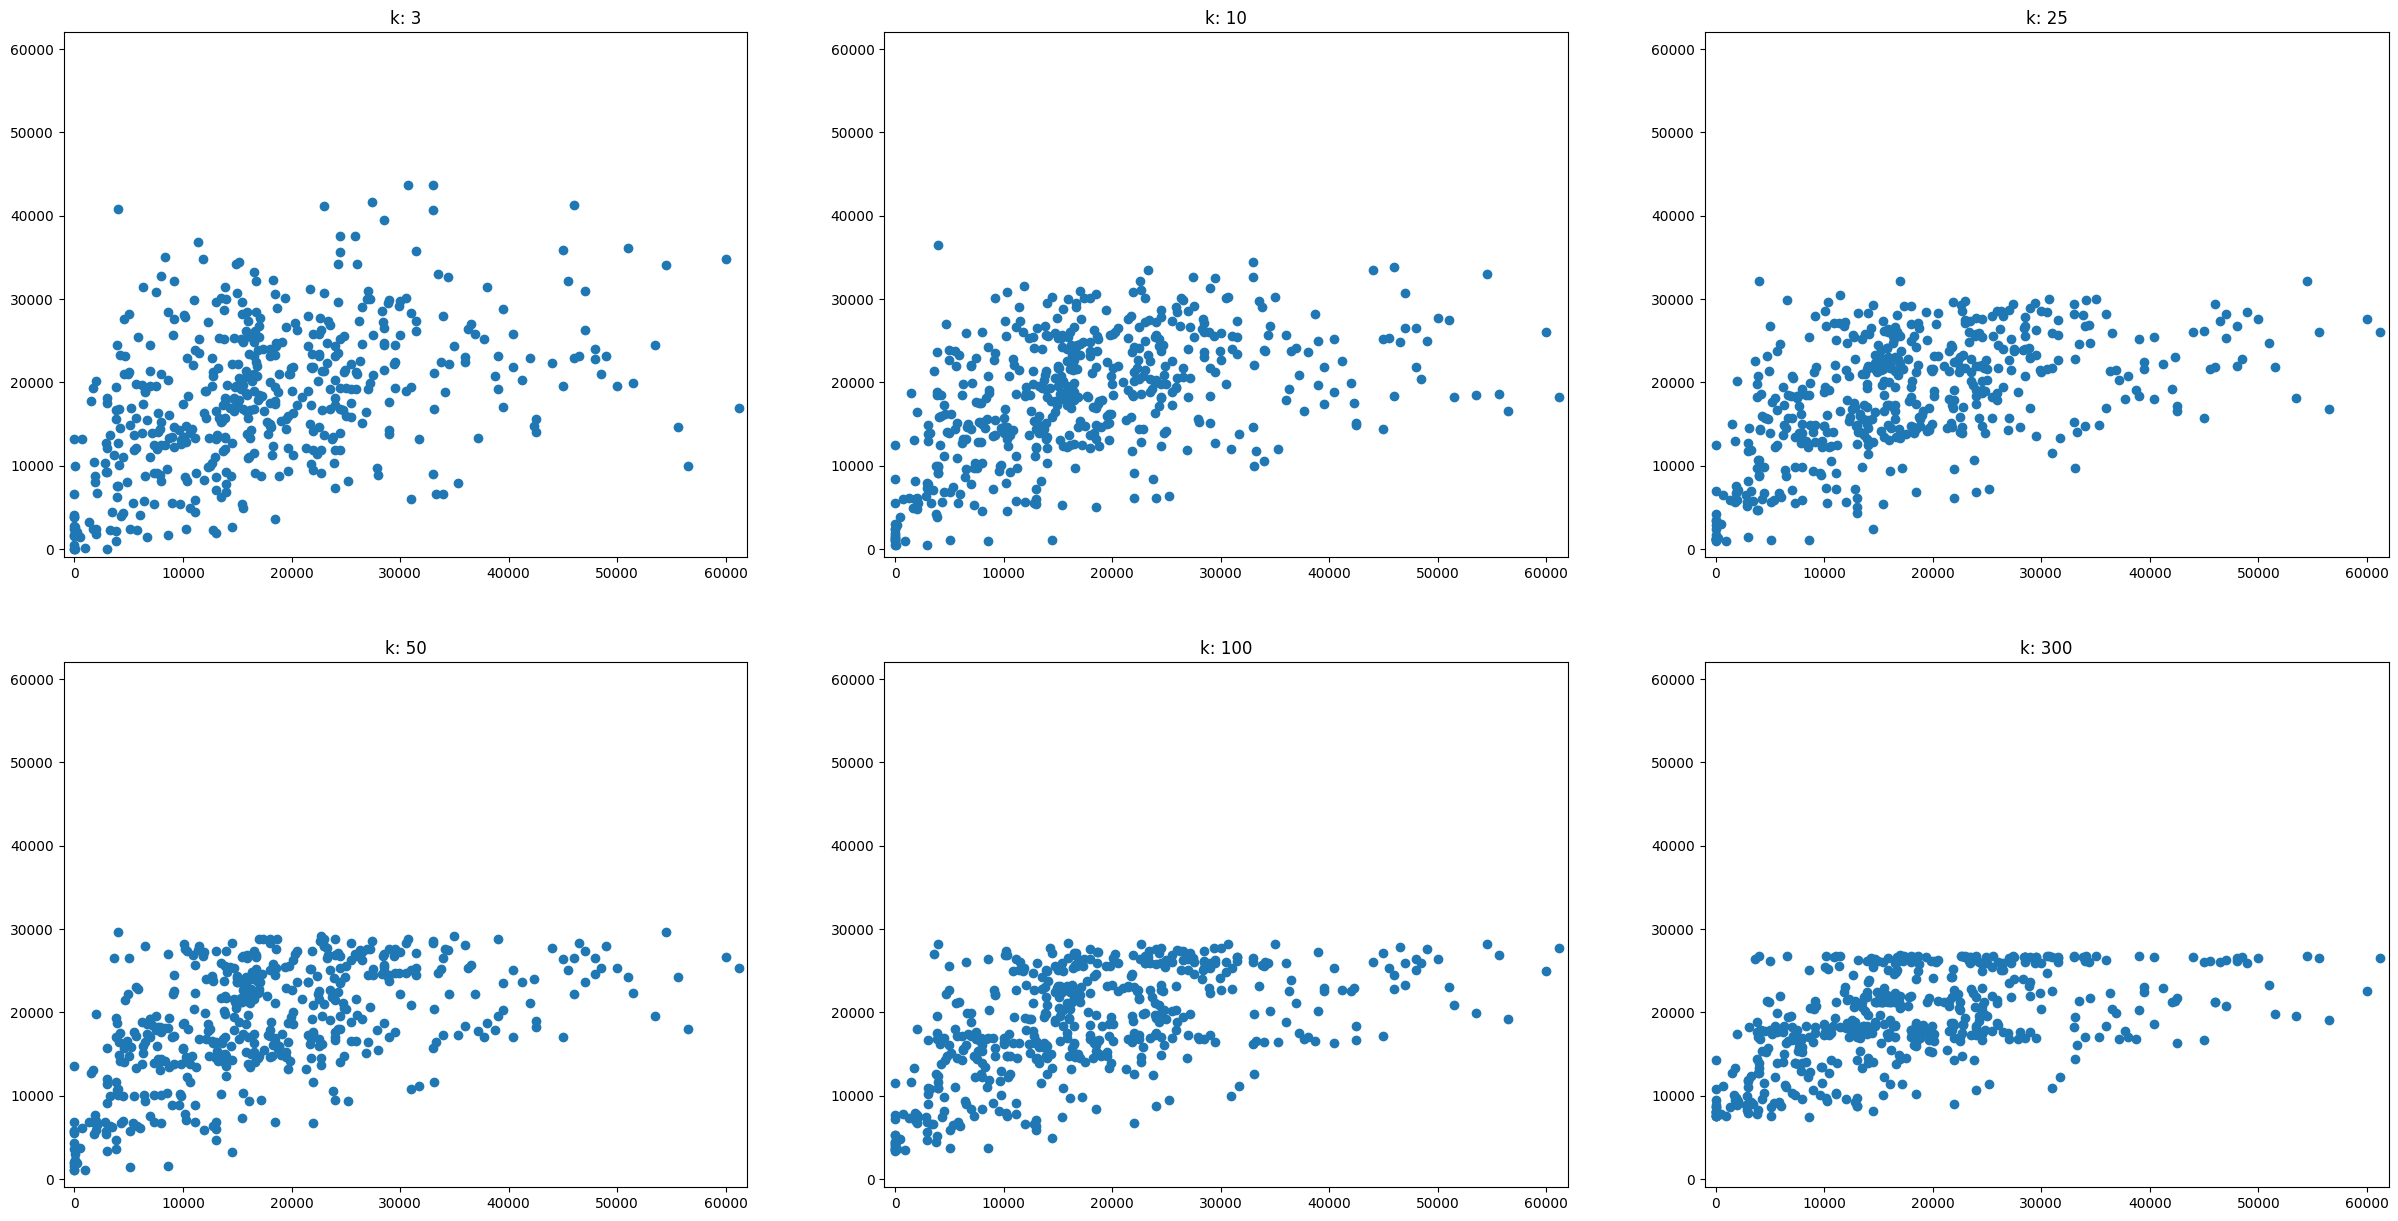

In [77]:
# RESOURCE
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.neighbors import KNeighborsRegressor

x_axis = 0
y_axis = 0
plot, axis = plt.subplots(2, 3, figsize=(30, 15)) 

for k in [3,10,25]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )

    axis[x_axis, y_axis].scatter(y_test,y_hat)
    axis[x_axis, y_axis].set_title(f"k: {k}") 
    
    axis[x_axis, y_axis].set_ylim(-1000, 62000)
    axis[x_axis, y_axis].set_xlim(-1000, 62000)
    
    y_axis = y_axis + 1
    
x_axis = 1
y_axis = 0    
for k in [50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )

    axis[x_axis, y_axis].scatter(y_test,y_hat)
    axis[x_axis, y_axis].set_title(f"k: {k}") 
    
    axis[x_axis, y_axis].set_ylim(-1000, 62000)
    axis[x_axis, y_axis].set_xlim(-1000, 62000)    
    
    y_axis = y_axis + 1
        
    
plt.show()

5. Determine the optimal $k$ for these data.

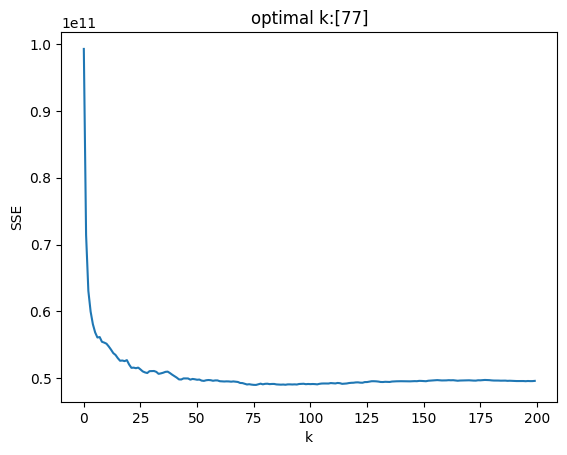

In [79]:
k_bar = 200
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
 
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title(f"optimal k:{k_star}")
plt.ylabel('SSE')
plt.show()

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [80]:
print("In the case of a higher k, the model is likely overfitting the data since I found that the optimal value for k is 77 which makes sense since the data is much more horizontal and clustered than for other k values. On the other hand, for k=3, there is certainly underfitting going becuase the variance is high and there isn't enough clustering of data.")

In the case of a higher k, the model is likely overfitting the data since I found that the optimal value for k is 77 which makes sense since the data is much more horizontal and clustered than for other k values. On the other hand, for k=3, there is certainly underfitting going becuase the variance is high and there isn't enough clustering of data.


**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [7]:
# RESOURCES
# https://saturncloud.io/blog/how-to-count-the-number-of-missingnan-values-in-each-row-in-python-pandas/#:~:text=(axis%3D1)-,To%20count%20the%20number%20of%20missing%2FNaN%20values%20in%20each,True%20values%20in%20each%20row.

import numpy as np
import pandas as pd

heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure = heart_failure.drop("time", axis=1)

print(med_data.loc[med_data['City'] == ' '], '\n')
print(med_data.loc[med_data['City'] == np.nan], '\n')

(299, 12)
Num of NaN values: 0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    0
296    0
297    0
298    0
Length: 299, dtype: int64


2. Make a correlation matrix. What variables are strongly associated with a death event?

In [8]:
heart_failure.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [10]:
print("It seems that age (0.253729), ejection_fraction (-0.268603), and serum_sodium (0.294278) correlate the greatest to DEATH_EVENT")

It seems that age (0.253729), ejection_fraction (-0.268603), and serum_sodium (0.294278) correlate the greatest to DEATH_EVENT


3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [15]:
heart_failure.loc[:,['anaemia', 'DEATH_EVENT']].groupby('anaemia').describe()

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0

In [16]:
heart_failure.loc[:,['diabetes', 'DEATH_EVENT']].groupby('diabetes').describe()

DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0

In [17]:
heart_failure.loc[:,['sex', 'DEATH_EVENT']].groupby('sex').describe()

DEATH_EVENT                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
0         105.0  0.323810  0.470173  0.0  0.0  0.0  1.0  1.0
1         194.0  0.319588  0.467523  0.0  0.0  0.0  1.0  1.0

In [18]:
heart_failure.loc[:,['high_blood_pressure', 'DEATH_EVENT']].groupby('high_blood_pressure').describe()

DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.371429  0.485504  0.0  0.0  0.0  1.0  1.0

In [19]:
heart_failure.loc[:,['smoking', 'DEATH_EVENT']].groupby('smoking').describe()

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
smoking                                                         
0             203.0  0.325123  0.469579  0.0  0.0  0.0  1.0  1.0
1              96.0  0.312500  0.465946  0.0  0.0  0.0  1.0  1.0

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [21]:
X = heart_failure.loc[:,['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']]
y = heart_failure['DEATH_EVENT']

5. Maxmin normalize all of the variables in `X`.

In [23]:
def maxmin(df):
    # copy the dataframe
    df_norm = (df-min(df))/(max(df)-min(df))    
    return df_norm

In [24]:
X = X.apply(maxmin)

6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [36]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(100) 
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) )
test = [item for item in all if item not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

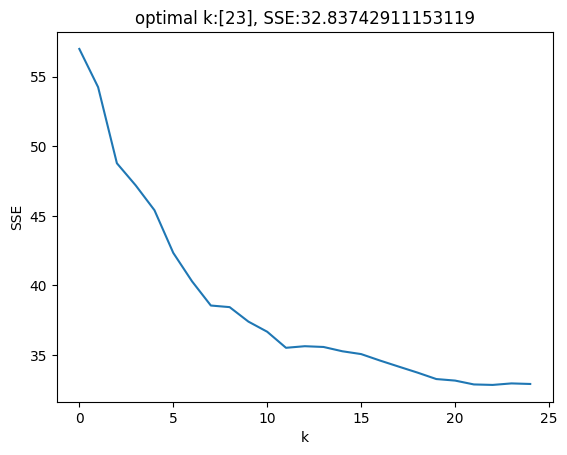

In [41]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k_bar = 25
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title(f"optimal k:{k_star}, SSE:{SSE_min}")
plt.ylabel('SSE')
plt.show()

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

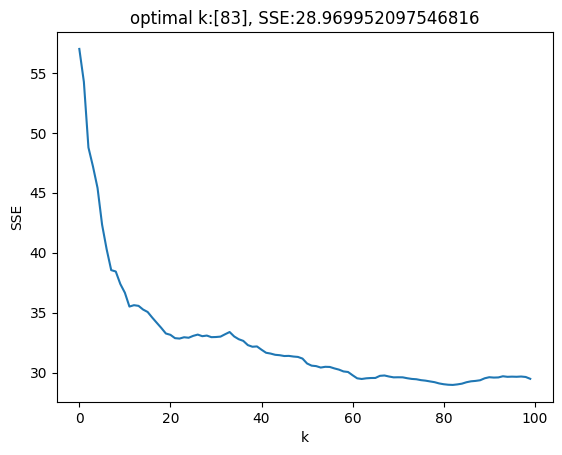

In [40]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure = heart_failure.drop("time", axis=1)
X = heart_failure.drop('DEATH_EVENT',axis=1)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title(f"optimal k:{k_star}, SSE:{SSE_min}")
plt.ylabel('SSE')
plt.show()


In [29]:
print("In practice, I would rather use the simpler model because it does a better job predicting since it has fewer variables which means less factors to look at for prediction. However, less variables is not always better because in step 8, having more variables actually led to a better SSE for some reaosn.")

In practice, I would rather use the simpler model because it does a better job predicting since it has a lower SSE.


**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)